In [1]:
##pip install yellowbrick

In [2]:
##pip install matplotlib_venn

In [3]:
##pip install xgboost

In [4]:
##pip install kmapper

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
from scipy import stats


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches


from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
import kmapper as km
from sklearn.cluster import KMeans

import warnings

In [6]:
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

# load Dataset

In [7]:
cancer_data = pd.read_csv('METABRIC_RNA_Mutation.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_576\3476877925.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  cancer_data = pd.read_csv('METABRIC_RNA_Mutation.csv')


In [8]:
final_data= cancer_data.loc[:,"patient_id":"death_from_cancer"]
final_data.shape

(1904, 31)

In [9]:
final_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [10]:
print(final_data.isnull().sum()/len(final_data)*100)

patient_id                         0.000000
age_at_diagnosis                   0.000000
type_of_breast_surgery             1.155462
cancer_type                        0.000000
cancer_type_detailed               0.787815
cellularity                        2.836134
chemotherapy                       0.000000
pam50_+_claudin-low_subtype        0.000000
cohort                             0.000000
er_status_measured_by_ihc          1.575630
er_status                          0.000000
neoplasm_histologic_grade          3.781513
her2_status_measured_by_snp6       0.000000
her2_status                        0.000000
tumor_other_histologic_subtype     0.787815
hormone_therapy                    0.000000
inferred_menopausal_state          0.000000
integrative_cluster                0.000000
primary_tumor_laterality           5.567227
lymph_nodes_examined_positive      0.000000
mutation_count                     2.363445
nottingham_prognostic_index        0.000000
oncotree_code                   

# Data Visualization

Text(0.5, 1.0, 'Missing value')

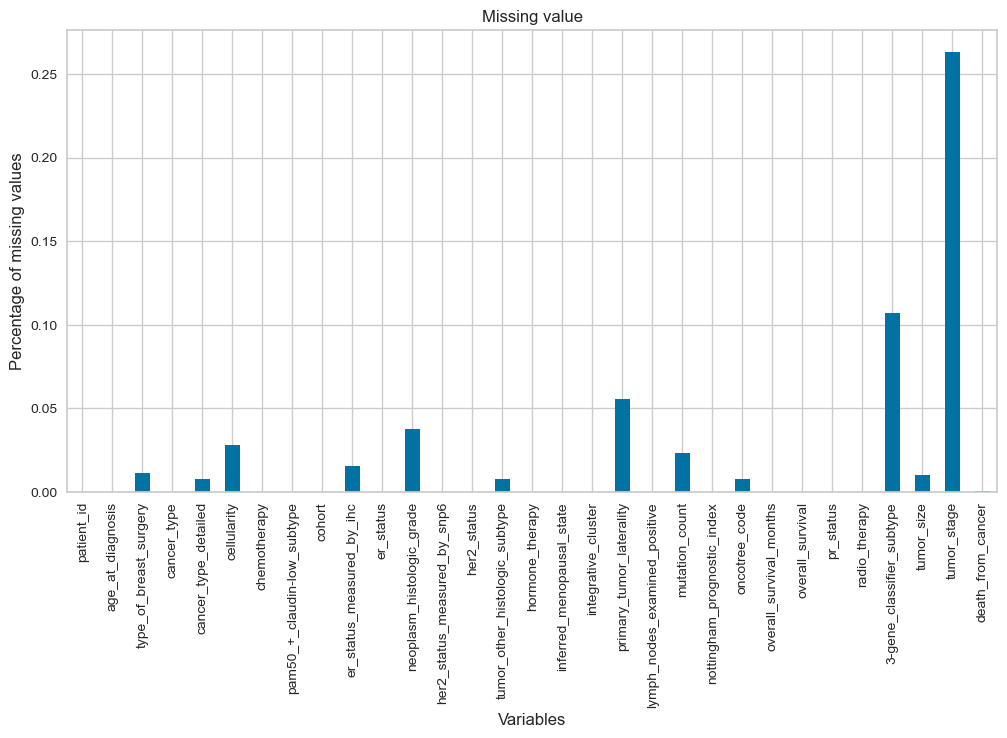

In [11]:
final_data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Missing value')

In [12]:
def to_standard (final_data):
    
    num_df = final_data[final_data.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

Text(0, 0.5, 'Variables')

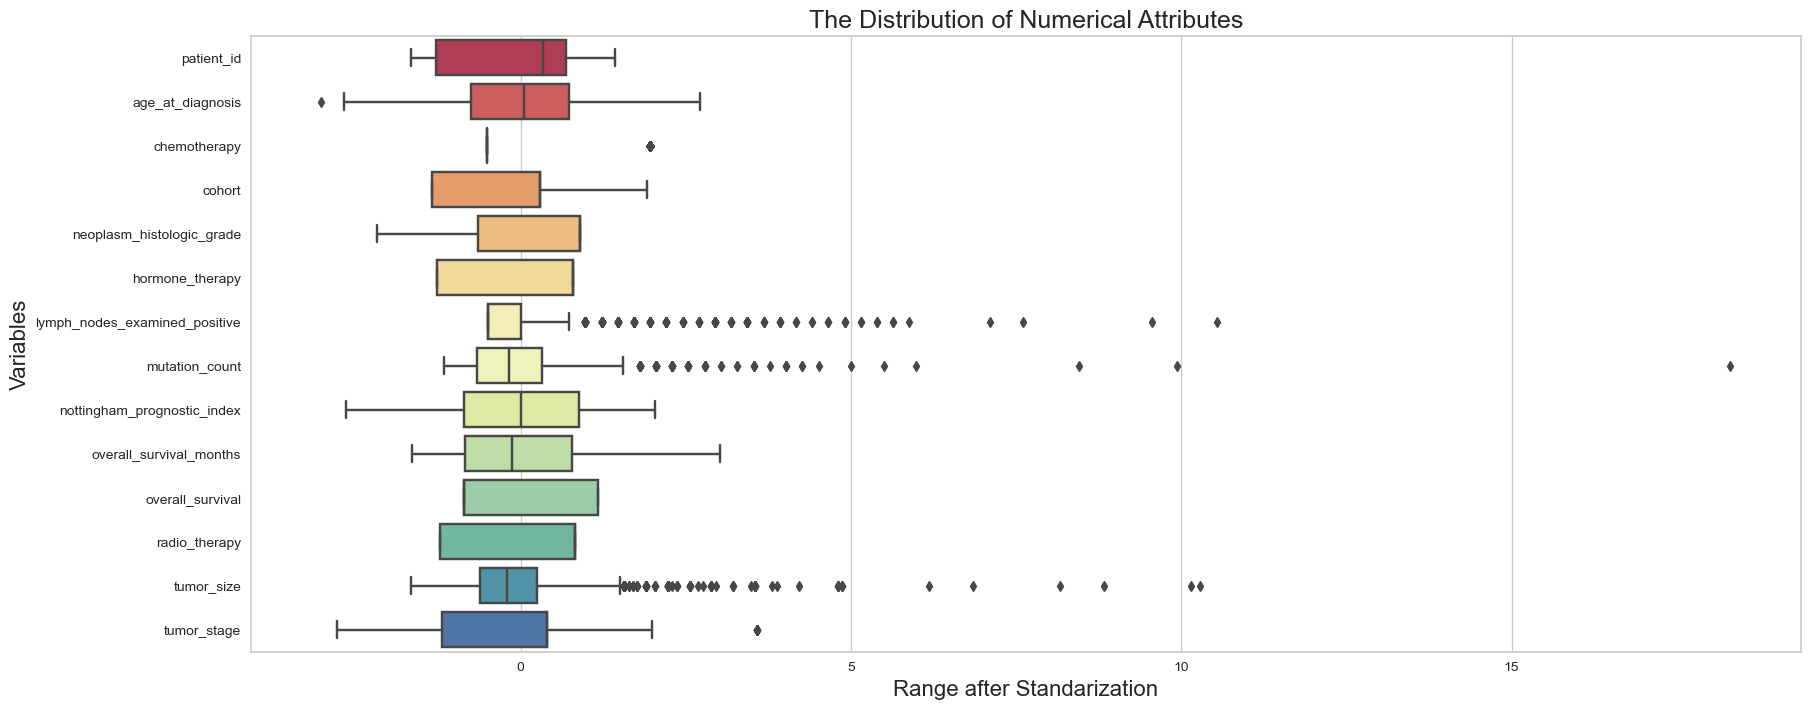

In [13]:
ax, fig = plt.subplots(1, 1, figsize = (20, 8))
plt.title('The Distribution of Numerical Attributes', fontsize = 18) 

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(final_data)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Variables', size = 16)

C:\Users\Admin\AppData\Local\Temp\ipykernel_576\191260119.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data[i][final_data['overall_survival']==1], color='g', label = 'survived')
C:\Users\Admin\AppData\Local\Temp\ipykernel_576\191260119.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

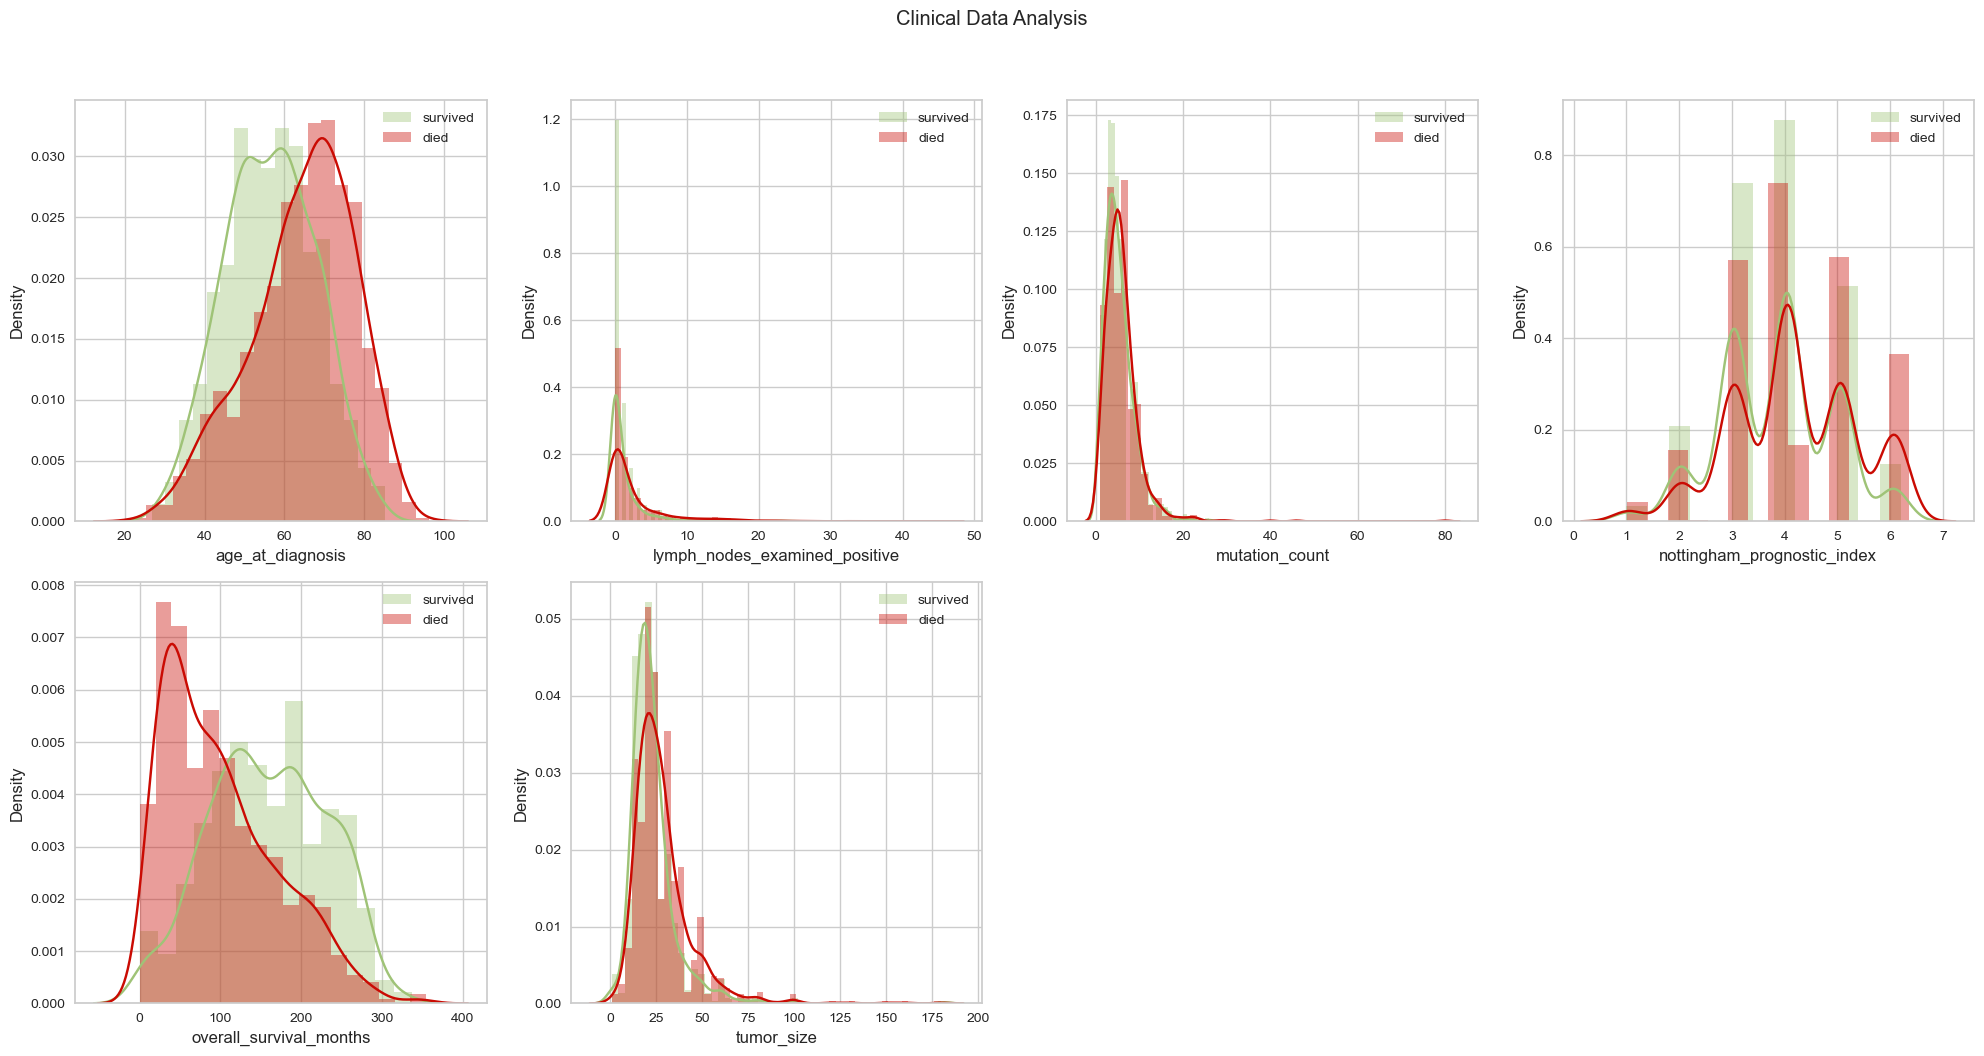

In [14]:
fig = plt.figure(figsize = (20, 30))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count',
                       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in cancer_data[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(final_data[i][final_data['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(final_data[i][final_data['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


In [15]:
died = final_data[final_data['overall_survival']==0]
survived = final_data[final_data['overall_survival']==1]

alive_from_cancer = final_data[final_data['death_from_cancer']=='Living']
died_from_cancer = final_data[final_data['death_from_cancer']=='Died of Disease']
died_not_cancer = final_data[final_data['death_from_cancer']=='Died of Other Causes']

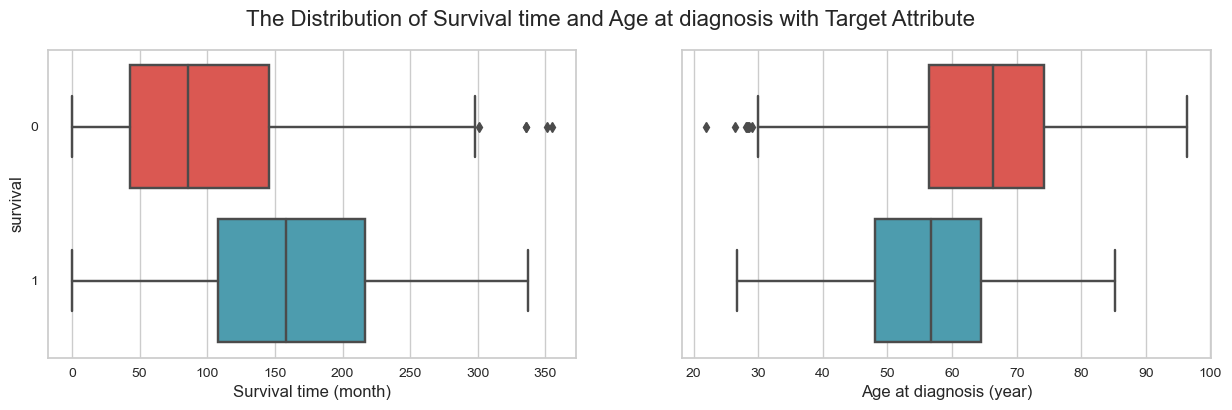

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=final_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=final_data, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time and Age at diagnosis with Target Attribute', fontsize = 16)

ax[0].set_xlabel('Survival time (month)')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis (year)')
ax[1].set_ylabel('')

plt.show()

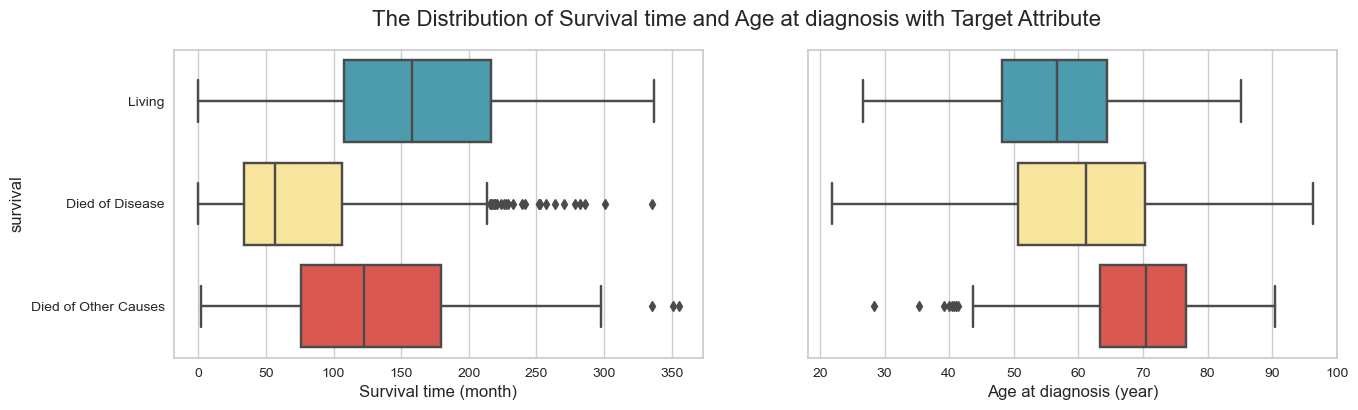

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=final_data, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=final_data, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time and Age at diagnosis with Target Attribute', fontsize = 16)

ax[0].set_xlabel('Survival time (month)')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis (year)')
ax[1].set_ylabel('')

plt.show()

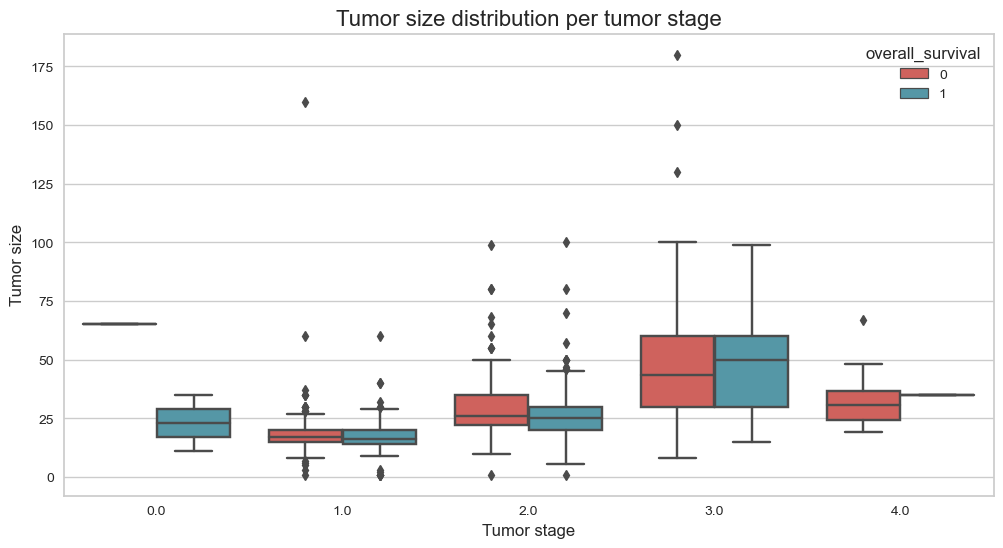

In [18]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_stage', y ='tumor_size',  data = final_data, orient='v', hue='overall_survival', palette=two_colors)

ax.set_ylabel('Tumor size')
ax.set_xlabel('Tumor stage')
plt.title('Tumor size distribution per tumor stage', fontsize=16)
plt.show()

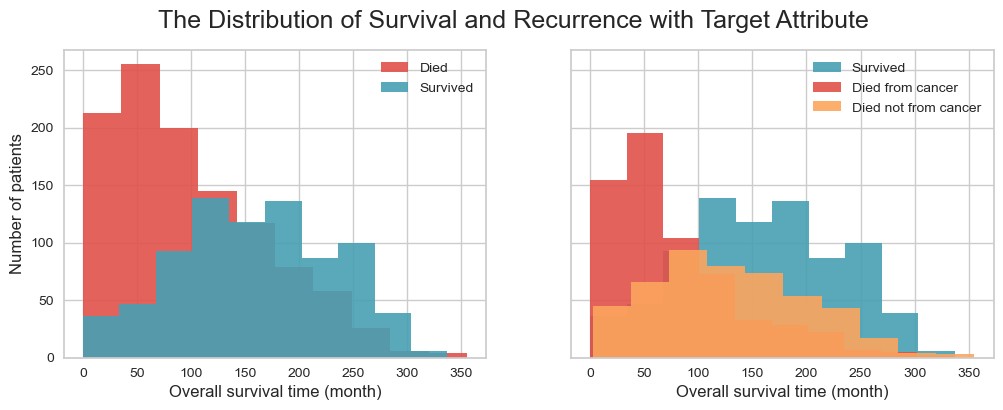

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive_from_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_from_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Overall survival time (month)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Overall survival time (month)')
ax[1].set_ylabel('')

plt.show()

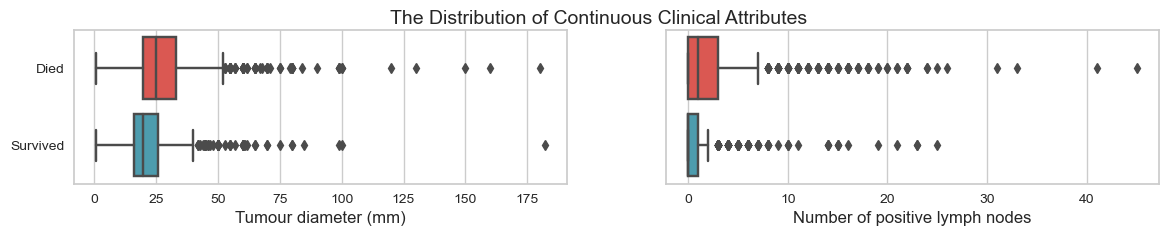

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(14,2), sharey=True)

sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=final_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=final_data, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 14)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])

ax[0].set_xlabel('Tumour diameter (mm)')
ax[0].set_ylabel('')

ax[1].set_xlabel('Number of positive lymph nodes')
ax[1].set_ylabel('')

plt.show()

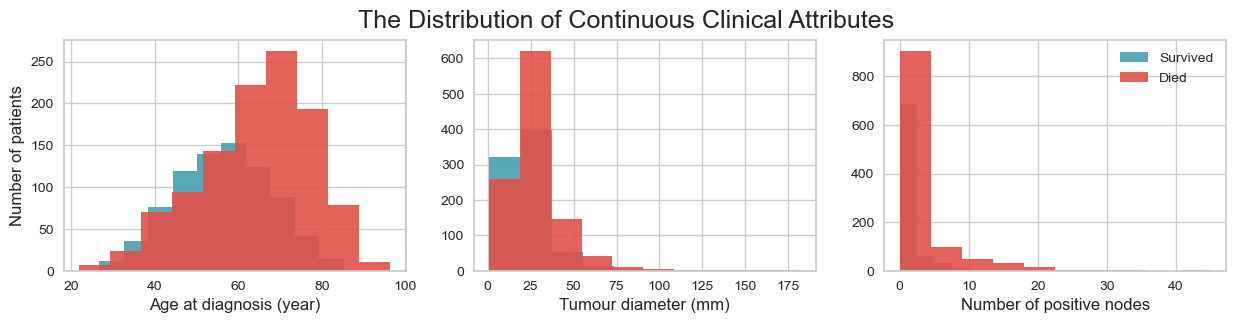

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age at diagnosis (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

In [23]:
BOLD = '\033[1m'
END = '\033[0m'

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print('Baseline accuracy:' )
print(cancer_data["overall_survival"].value_counts()/cancer_data["overall_survival"].count())

Baseline accuracy:
0    0.579307
1    0.420693
Name: overall_survival, dtype: float64


In [24]:
categorical_columns = final_data.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 

dummies_cancer_data = pd.get_dummies(final_data.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_cancer_data.dropna(inplace = True)

In [25]:

X = dummies_cancer_data.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_cancer_data['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

# Implement Deep Learning Models

In [28]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)


    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
  
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
   
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) 
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) 
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i])     
    plt.show()
    
    

def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) 
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) 
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i])    
    plt.show()   


K Neighbors Classifier Model:
CV scores:  [0.67045455 0.6875     0.67428571 0.64571429 0.66857143]
CV Standard Deviation:  0.013522181199120655

CV Mean score:  0.6693051948051948
Train score:    1.0
Test score:     0.6458333333333334



Confusion Matrix: 
[[203  42]
 [111  76]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       245
           1       0.64      0.41      0.50       187

    accuracy                           0.65       432
   macro avg       0.65      0.62      0.61       432
weighted avg       0.65      0.65      0.63       432


Logistic Regression Model:


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Va

CV scores:  [0.71590909 0.72159091 0.74857143 0.70285714 0.74857143]
CV Standard Deviation:  0.018245805771028675

CV Mean score:  0.7275
Train score:    0.7765108323831242
Test score:     0.7777777777777778



Confusion Matrix: 
[[201  44]
 [ 52 135]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       245
           1       0.75      0.72      0.74       187

    accuracy                           0.78       432
   macro avg       0.77      0.77      0.77       432
weighted avg       0.78      0.78      0.78       432


Decision Tree Classifier Model:
CV scores:  [0.71022727 0.59659091 0.71428571 0.67428571 0.72      ]
CV Standard Deviation:  0.04611195009219897

CV Mean score:  0.6830779220779221
Train score:    1.0
Test score:     0.6898148148148148



Confusion Matrix: 
[[183  62]
 [ 72 115]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.72      0.75

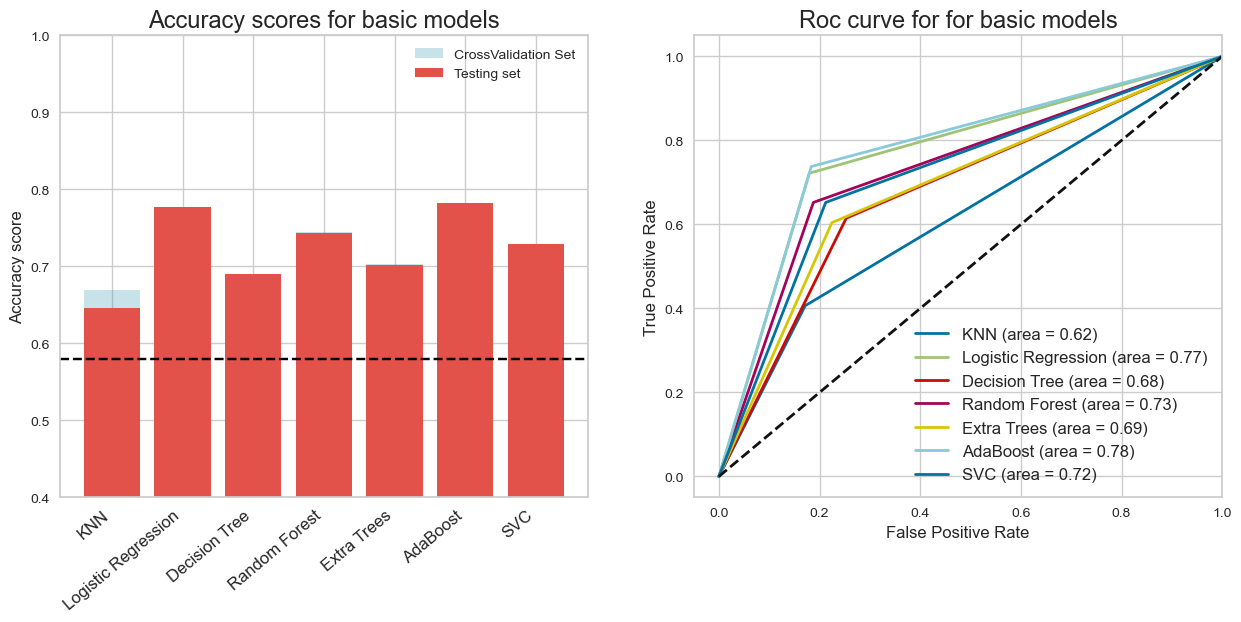

In [29]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)